In [34]:
import yfinance as yf
import pandas as pd 

data = yf.download("AAPL", start="2010-01-01",end="2023-12-31",interval="1d",auto_adjust=False)

if isinstance(data.columns,pd.MultiIndex):
    data.columns=data.columns.get_level_values(0)#To handle multi level indexes
    
data.index=pd.to_datetime(data.index) #not required just best practice

weekly =data.resample('W-MON').agg({
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'last'
})

weekly.dropna(inplace=True)

print(weekly.head())

[*********************100%***********************]  1 of 1 completed

Price           Open      High       Low     Close
Date                                              
2010-01-04  7.622500  7.660714  7.585000  7.643214
2010-01-11  7.664286  7.699643  7.444643  7.503929
2010-01-18  7.471071  7.557143  7.289286  7.354643
2010-01-25  7.440357  7.698214  7.041429  7.252500
2010-02-01  7.355357  7.632500  6.794643  6.954643


In [54]:
import yfinance as yf
import pandas as pd

# Download daily data
data = yf.download("AAPL", start="2010-01-01", end="2023-12-31", interval="1d", auto_adjust=False)

# Handle multilevel column if exists
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

data.index = pd.to_datetime(data.index)

# Create weekly OHLC from daily
weekly = data.resample('W-MON').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})
weekly.dropna(inplace=True)

# Trade Engine variables
tp_count = 0
sl_count = 0
total_trades = 0

# Loop through weekly data (starting from index 2 for i-2 access)
for i in range(2, len(weekly)-1):  # -1 to ensure we have a next week for slicing
    prev2 = weekly.iloc[i-2]
    prev1 = weekly.iloc[i-1]
    current = weekly.iloc[i]

    # Trade Signal Condition
    if (
        prev2['High'] > prev1['High'] and
        prev2['Low'] < prev1['Low'] and
        current['Close'] > prev1['High']
    ):
        trade_signal = True
    else:
        trade_signal = False

    if trade_signal:
        total_trades += 1

        entry_price = current['Close']
        sl = prev2['Low']
        tp = entry_price + (entry_price - sl) * 5

        first_hit = 0

        # Start checking daily candles *after* the current weekly signal
        entry_date = weekly.index[i]
        daily_range = data.loc[entry_date:]

        for j in range(len(daily_range)):
            price = daily_range.iloc[j]['Close']

            if price >= tp:
                tp_count += 1
                first_hit += 1
                break
            elif price <= sl:
                sl_count += 1
                first_hit += 1
                break


# Final Results
print("Total Trades:", total_trades)
print("TP Hit:", tp_count)
print("SL Hit:", sl_count)

if total_trades > 0:
    print("Win Rate (%):", round(tp_count / total_trades * 100, 2))


[*********************100%***********************]  1 of 1 completed

Total Trades: 41
TP Hit: 17
SL Hit: 23
Win Rate (%): 41.46


[*********************100%***********************]  1 of 1 completed


Running strategy for MMM...
MMM | Trades: 26, TP Hits: 3, SL Hits: 21



[*********************100%***********************]  1 of 1 completed


Running strategy for AOS...
AOS | Trades: 35, TP Hits: 13, SL Hits: 19



[*********************100%***********************]  1 of 1 completed


Running strategy for ABT...
ABT | Trades: 25, TP Hits: 8, SL Hits: 16



[*********************100%***********************]  1 of 1 completed


Running strategy for ABBV...
ABBV | Trades: 28, TP Hits: 12, SL Hits: 15



[*********************100%***********************]  1 of 1 completed


Running strategy for ACN...
ACN | Trades: 35, TP Hits: 16, SL Hits: 19



[*********************100%***********************]  1 of 1 completed


Running strategy for ADBE...
ADBE | Trades: 39, TP Hits: 21, SL Hits: 18



[*********************100%***********************]  1 of 1 completed


Running strategy for AMD...
AMD | Trades: 33, TP Hits: 12, SL Hits: 21



[*********************100%***********************]  1 of 1 completed


Running strategy for AES...
AES | Trades: 27, TP Hits: 6, SL Hits: 18



[*********************100%***********************]  1 of 1 completed


Running strategy for AFL...
AFL | Trades: 33, TP Hits: 16, SL Hits: 16



[*********************100%***********************]  1 of 1 completed


Running strategy for A...
A | Trades: 30, TP Hits: 16, SL Hits: 14



Running strategy for APD...


[*********************100%***********************]  1 of 1 completed


APD | Trades: 26, TP Hits: 6, SL Hits: 19

Running strategy for ABNB...


[*********************100%***********************]  1 of 1 completed


ABNB | Trades: 5, TP Hits: 1, SL Hits: 2

Running strategy for AKAM...


[*********************100%***********************]  1 of 1 completed


AKAM | Trades: 33, TP Hits: 11, SL Hits: 21

Running strategy for ALB...


[*********************100%***********************]  1 of 1 completed


ALB | Trades: 39, TP Hits: 18, SL Hits: 21

Running strategy for ARE...


[*********************100%***********************]  1 of 1 completed


ARE | Trades: 30, TP Hits: 9, SL Hits: 19

Running strategy for ALGN...


[*********************100%***********************]  1 of 1 completed


ALGN | Trades: 44, TP Hits: 22, SL Hits: 20

Running strategy for ALLE...


[*********************100%***********************]  1 of 1 completed


ALLE | Trades: 26, TP Hits: 10, SL Hits: 15

Running strategy for LNT...


[*********************100%***********************]  1 of 1 completed


LNT | Trades: 34, TP Hits: 17, SL Hits: 16

Running strategy for ALL...


[*********************100%***********************]  1 of 1 completed


ALL | Trades: 29, TP Hits: 10, SL Hits: 16

Running strategy for GOOGL...


[*********************100%***********************]  1 of 1 completed


GOOGL | Trades: 41, TP Hits: 17, SL Hits: 19

Running strategy for GOOG...


[*********************100%***********************]  1 of 1 completed


GOOG | Trades: 44, TP Hits: 21, SL Hits: 18

Running strategy for MO...


[*********************100%***********************]  1 of 1 completed


MO | Trades: 29, TP Hits: 14, SL Hits: 14

Running strategy for AMZN...


[*********************100%***********************]  1 of 1 completed


AMZN | Trades: 35, TP Hits: 19, SL Hits: 16

Running strategy for AMCR...


[*********************100%***********************]  1 of 1 completed


AMCR | Trades: 21, TP Hits: 4, SL Hits: 14

Running strategy for AEE...


[*********************100%***********************]  1 of 1 completed


AEE | Trades: 25, TP Hits: 6, SL Hits: 19

Running strategy for AEP...


[*********************100%***********************]  1 of 1 completed


AEP | Trades: 35, TP Hits: 15, SL Hits: 18

Running strategy for AXP...


[*********************100%***********************]  1 of 1 completed


AXP | Trades: 24, TP Hits: 10, SL Hits: 12

Running strategy for AIG...


[*********************100%***********************]  1 of 1 completed


AIG | Trades: 37, TP Hits: 10, SL Hits: 23

Running strategy for AMT...


[*********************100%***********************]  1 of 1 completed


AMT | Trades: 32, TP Hits: 15, SL Hits: 16

Running strategy for AWK...


[*********************100%***********************]  1 of 1 completed


AWK | Trades: 25, TP Hits: 8, SL Hits: 13

Running strategy for AMP...


[*********************100%***********************]  1 of 1 completed


AMP | Trades: 29, TP Hits: 10, SL Hits: 17

Running strategy for AME...


[*********************100%***********************]  1 of 1 completed


AME | Trades: 18, TP Hits: 4, SL Hits: 14

Running strategy for AMGN...


[*********************100%***********************]  1 of 1 completed


AMGN | Trades: 26, TP Hits: 13, SL Hits: 12

Running strategy for APH...


[*********************100%***********************]  1 of 1 completed


APH | Trades: 30, TP Hits: 10, SL Hits: 20

Running strategy for ADI...


[*********************100%***********************]  1 of 1 completed


ADI | Trades: 31, TP Hits: 11, SL Hits: 20

Running strategy for ANSS...


[*********************100%***********************]  1 of 1 completed


ANSS | Trades: 27, TP Hits: 10, SL Hits: 16

Running strategy for AON...


[*********************100%***********************]  1 of 1 completed


AON | Trades: 37, TP Hits: 18, SL Hits: 18

Running strategy for APA...


[*********************100%***********************]  1 of 1 completed


APA | Trades: 26, TP Hits: 3, SL Hits: 21

Running strategy for APO...


[*********************100%***********************]  1 of 1 completed


APO | Trades: 22, TP Hits: 6, SL Hits: 13

Running strategy for AAPL...


[*********************100%***********************]  1 of 1 completed


AAPL | Trades: 41, TP Hits: 19, SL Hits: 22

Running strategy for AMAT...


[*********************100%***********************]  1 of 1 completed


AMAT | Trades: 41, TP Hits: 19, SL Hits: 22

Running strategy for APTV...


[*********************100%***********************]  1 of 1 completed


APTV | Trades: 34, TP Hits: 12, SL Hits: 21

Running strategy for ACGL...


[*********************100%***********************]  1 of 1 completed


ACGL | Trades: 32, TP Hits: 15, SL Hits: 16

Running strategy for ADM...


[*********************100%***********************]  1 of 1 completed


ADM | Trades: 27, TP Hits: 9, SL Hits: 18

Running strategy for ANET...


[*********************100%***********************]  1 of 1 completed


ANET | Trades: 24, TP Hits: 13, SL Hits: 11

Running strategy for AJG...


[*********************100%***********************]  1 of 1 completed


AJG | Trades: 30, TP Hits: 17, SL Hits: 12

Running strategy for AIZ...


[*********************100%***********************]  1 of 1 completed


AIZ | Trades: 42, TP Hits: 11, SL Hits: 28

Running strategy for T...


[*********************100%***********************]  1 of 1 completed


T | Trades: 36, TP Hits: 5, SL Hits: 29

Running strategy for ATO...


[*********************100%***********************]  1 of 1 completed


ATO | Trades: 28, TP Hits: 10, SL Hits: 16

Running strategy for ADSK...


[*********************100%***********************]  1 of 1 completed


ADSK | Trades: 26, TP Hits: 10, SL Hits: 16

Running strategy for ADP...


[*********************100%***********************]  1 of 1 completed


ADP | Trades: 33, TP Hits: 17, SL Hits: 16

Running strategy for AZO...


[*********************100%***********************]  1 of 1 completed


AZO | Trades: 28, TP Hits: 17, SL Hits: 10

Running strategy for AVB...


[*********************100%***********************]  1 of 1 completed


AVB | Trades: 42, TP Hits: 11, SL Hits: 26

Running strategy for AVY...


[*********************100%***********************]  1 of 1 completed


AVY | Trades: 35, TP Hits: 12, SL Hits: 20

Running strategy for AXON...


[*********************100%***********************]  1 of 1 completed


AXON | Trades: 33, TP Hits: 13, SL Hits: 19

Running strategy for BKR...


[*********************100%***********************]  1 of 1 completed


BKR | Trades: 22, TP Hits: 7, SL Hits: 15

Running strategy for BALL...


[*********************100%***********************]  1 of 1 completed


BALL | Trades: 25, TP Hits: 7, SL Hits: 17

Running strategy for BAC...


[*********************100%***********************]  1 of 1 completed


BAC | Trades: 38, TP Hits: 15, SL Hits: 21

Running strategy for BAX...


[*********************100%***********************]  1 of 1 completed


BAX | Trades: 36, TP Hits: 17, SL Hits: 17

Running strategy for BDX...


[*********************100%***********************]  1 of 1 completed


BDX | Trades: 39, TP Hits: 16, SL Hits: 21

Running strategy for BRK.B...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


BRK.B has no data.

Running strategy for BBY...


[*********************100%***********************]  1 of 1 completed


BBY | Trades: 30, TP Hits: 9, SL Hits: 21

Running strategy for TECH...


[*********************100%***********************]  1 of 1 completed


TECH | Trades: 30, TP Hits: 8, SL Hits: 21

Running strategy for BIIB...


[*********************100%***********************]  1 of 1 completed


BIIB | Trades: 41, TP Hits: 11, SL Hits: 30

Running strategy for BLK...


[*********************100%***********************]  1 of 1 completed


BLK | Trades: 33, TP Hits: 11, SL Hits: 21

Running strategy for BX...


[*********************100%***********************]  1 of 1 completed


BX | Trades: 32, TP Hits: 14, SL Hits: 16

Running strategy for BK...


[*********************100%***********************]  1 of 1 completed


BK | Trades: 24, TP Hits: 8, SL Hits: 15

Running strategy for BA...


[*********************100%***********************]  1 of 1 completed


BA | Trades: 31, TP Hits: 11, SL Hits: 20

Running strategy for BKNG...


[*********************100%***********************]  1 of 1 completed


BKNG | Trades: 27, TP Hits: 12, SL Hits: 15

Running strategy for BSX...


[*********************100%***********************]  1 of 1 completed


BSX | Trades: 32, TP Hits: 14, SL Hits: 18

Running strategy for BMY...


[*********************100%***********************]  1 of 1 completed


BMY | Trades: 35, TP Hits: 7, SL Hits: 27

Running strategy for AVGO...


[*********************100%***********************]  1 of 1 completed


AVGO | Trades: 32, TP Hits: 20, SL Hits: 12

Running strategy for BR...


[*********************100%***********************]  1 of 1 completed


BR | Trades: 30, TP Hits: 13, SL Hits: 15

Running strategy for BRO...


[*********************100%***********************]  1 of 1 completed


BRO | Trades: 28, TP Hits: 14, SL Hits: 13

Running strategy for BF.B...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2023-12-31)')


BF.B has no data.

Running strategy for BLDR...


[*********************100%***********************]  1 of 1 completed


BLDR | Trades: 35, TP Hits: 16, SL Hits: 18

Running strategy for BG...


[*********************100%***********************]  1 of 1 completed


BG | Trades: 30, TP Hits: 12, SL Hits: 18

Running strategy for BXP...


[*********************100%***********************]  1 of 1 completed


BXP | Trades: 26, TP Hits: 4, SL Hits: 21

Running strategy for CHRW...


[*********************100%***********************]  1 of 1 completed


CHRW | Trades: 46, TP Hits: 12, SL Hits: 33

Running strategy for CDNS...


[*********************100%***********************]  1 of 1 completed


CDNS | Trades: 28, TP Hits: 17, SL Hits: 11

Running strategy for CZR...


[*********************100%***********************]  1 of 1 completed


CZR | Trades: 24, TP Hits: 12, SL Hits: 12

Running strategy for CPT...


[*********************100%***********************]  1 of 1 completed


CPT | Trades: 38, TP Hits: 14, SL Hits: 23

Running strategy for CPB...


[*********************100%***********************]  1 of 1 completed


CPB | Trades: 33, TP Hits: 9, SL Hits: 23

Running strategy for COF...


[*********************100%***********************]  1 of 1 completed


COF | Trades: 29, TP Hits: 7, SL Hits: 20

Running strategy for CAH...


[*********************100%***********************]  1 of 1 completed


CAH | Trades: 34, TP Hits: 10, SL Hits: 24

Running strategy for KMX...


[*********************100%***********************]  1 of 1 completed


KMX | Trades: 29, TP Hits: 14, SL Hits: 12

Running strategy for CCL...


[*********************100%***********************]  1 of 1 completed


CCL | Trades: 25, TP Hits: 8, SL Hits: 16


[*********************100%***********************]  1 of 1 completed


Running strategy for CARR...


CARR | Trades: 7, TP Hits: 4, SL Hits: 2

Running strategy for CAT...


[*********************100%***********************]  1 of 1 completed


CAT | Trades: 35, TP Hits: 13, SL Hits: 21

Running strategy for CBOE...


[*********************100%***********************]  1 of 1 completed


CBOE | Trades: 36, TP Hits: 19, SL Hits: 15

Running strategy for CBRE...


[*********************100%***********************]  1 of 1 completed


CBRE | Trades: 34, TP Hits: 17, SL Hits: 15

Running strategy for CDW...


[*********************100%***********************]  1 of 1 completed


CDW | Trades: 24, TP Hits: 16, SL Hits: 8

Running strategy for COR...


[*********************100%***********************]  1 of 1 completed


COR | Trades: 35, TP Hits: 16, SL Hits: 17

Running strategy for CNC...


[*********************100%***********************]  1 of 1 completed


CNC | Trades: 32, TP Hits: 13, SL Hits: 18

Running strategy for CNP...


[*********************100%***********************]  1 of 1 completed


CNP | Trades: 29, TP Hits: 10, SL Hits: 19

Running strategy for CF...


[*********************100%***********************]  1 of 1 completed


CF | Trades: 32, TP Hits: 14, SL Hits: 17

Running strategy for CRL...


[*********************100%***********************]  1 of 1 completed


CRL | Trades: 31, TP Hits: 10, SL Hits: 21

Running strategy for SCHW...


[*********************100%***********************]  1 of 1 completed


SCHW | Trades: 34, TP Hits: 9, SL Hits: 23

Running strategy for CHTR...


[*********************100%***********************]  1 of 1 completed


CHTR | Trades: 32, TP Hits: 13, SL Hits: 19

Running strategy for CVX...


[*********************100%***********************]  1 of 1 completed


CVX | Trades: 29, TP Hits: 9, SL Hits: 20

Running strategy for CMG...


[*********************100%***********************]  1 of 1 completed


CMG | Trades: 31, TP Hits: 14, SL Hits: 17

Running strategy for CB...


[*********************100%***********************]  1 of 1 completed


CB | Trades: 32, TP Hits: 14, SL Hits: 17

Running strategy for CHD...


[*********************100%***********************]  1 of 1 completed


CHD | Trades: 29, TP Hits: 10, SL Hits: 17

Running strategy for CI...


[*********************100%***********************]  1 of 1 completed


CI | Trades: 33, TP Hits: 14, SL Hits: 19

Running strategy for CINF...


[*********************100%***********************]  1 of 1 completed


CINF | Trades: 35, TP Hits: 14, SL Hits: 20

Running strategy for CTAS...


[*********************100%***********************]  1 of 1 completed


CTAS | Trades: 29, TP Hits: 19, SL Hits: 9

Running strategy for CSCO...


[*********************100%***********************]  1 of 1 completed


CSCO | Trades: 36, TP Hits: 12, SL Hits: 22

Running strategy for C...


[*********************100%***********************]  1 of 1 completed


C | Trades: 24, TP Hits: 9, SL Hits: 14

Running strategy for CFG...


[*********************100%***********************]  1 of 1 completed


CFG | Trades: 19, TP Hits: 3, SL Hits: 14

Running strategy for CLX...


[*********************100%***********************]  1 of 1 completed


CLX | Trades: 28, TP Hits: 11, SL Hits: 17

Running strategy for CME...


[*********************100%***********************]  1 of 1 completed


CME | Trades: 24, TP Hits: 11, SL Hits: 13

Running strategy for CMS...


[*********************100%***********************]  1 of 1 completed


CMS | Trades: 44, TP Hits: 17, SL Hits: 25

Running strategy for KO...


[*********************100%***********************]  1 of 1 completed


KO | Trades: 36, TP Hits: 8, SL Hits: 27

Running strategy for CTSH...


[*********************100%***********************]  1 of 1 completed


CTSH | Trades: 29, TP Hits: 7, SL Hits: 19

Running strategy for CL...


[*********************100%***********************]  1 of 1 completed


CL | Trades: 39, TP Hits: 9, SL Hits: 29

Running strategy for CMCSA...


[*********************100%***********************]  1 of 1 completed


CMCSA | Trades: 30, TP Hits: 7, SL Hits: 21

Running strategy for CAG...


[*********************100%***********************]  1 of 1 completed


CAG | Trades: 28, TP Hits: 7, SL Hits: 20

Running strategy for COP...


[*********************100%***********************]  1 of 1 completed


COP | Trades: 29, TP Hits: 14, SL Hits: 13

Running strategy for ED...


[*********************100%***********************]  1 of 1 completed


ED | Trades: 36, TP Hits: 9, SL Hits: 25

Running strategy for STZ...


[*********************100%***********************]  1 of 1 completed


STZ | Trades: 32, TP Hits: 16, SL Hits: 16

Running strategy for CEG...


[*********************100%***********************]  1 of 1 completed


CEG | Trades: 4, TP Hits: 3, SL Hits: 1

Running strategy for COO...


[*********************100%***********************]  1 of 1 completed


COO | Trades: 40, TP Hits: 20, SL Hits: 19

Running strategy for CPRT...


[*********************100%***********************]  1 of 1 completed


CPRT | Trades: 36, TP Hits: 21, SL Hits: 15

Running strategy for GLW...


[*********************100%***********************]  1 of 1 completed


GLW | Trades: 23, TP Hits: 10, SL Hits: 12

Running strategy for CPAY...


[*********************100%***********************]  1 of 1 completed


CPAY | Trades: 37, TP Hits: 14, SL Hits: 23

Running strategy for CTVA...


[*********************100%***********************]  1 of 1 completed


CTVA | Trades: 11, TP Hits: 4, SL Hits: 7

Running strategy for CSGP...


[*********************100%***********************]  1 of 1 completed


CSGP | Trades: 31, TP Hits: 15, SL Hits: 15

Running strategy for COST...


[*********************100%***********************]  1 of 1 completed


COST | Trades: 46, TP Hits: 24, SL Hits: 21

Running strategy for CTRA...


[*********************100%***********************]  1 of 1 completed


CTRA | Trades: 39, TP Hits: 10, SL Hits: 27


[*********************100%***********************]  1 of 1 completed


Running strategy for CRWD...


CRWD | Trades: 9, TP Hits: 4, SL Hits: 5

Running strategy for CCI...


[*********************100%***********************]  1 of 1 completed


CCI | Trades: 30, TP Hits: 13, SL Hits: 15

Running strategy for CSX...


[*********************100%***********************]  1 of 1 completed


CSX | Trades: 26, TP Hits: 10, SL Hits: 14

Running strategy for CMI...


[*********************100%***********************]  1 of 1 completed


CMI | Trades: 29, TP Hits: 13, SL Hits: 15

Running strategy for CVS...


[*********************100%***********************]  1 of 1 completed


CVS | Trades: 22, TP Hits: 6, SL Hits: 16

Running strategy for DHR...


[*********************100%***********************]  1 of 1 completed


DHR | Trades: 25, TP Hits: 13, SL Hits: 12

Running strategy for DRI...


[*********************100%***********************]  1 of 1 completed


DRI | Trades: 27, TP Hits: 10, SL Hits: 17

Running strategy for DVA...


[*********************100%***********************]  1 of 1 completed


DVA | Trades: 32, TP Hits: 7, SL Hits: 24

Running strategy for DAY...


[*********************100%***********************]  1 of 1 completed


DAY | Trades: 11, TP Hits: 2, SL Hits: 7

Running strategy for DECK...


[*********************100%***********************]  1 of 1 completed


DECK | Trades: 38, TP Hits: 12, SL Hits: 26

Running strategy for DE...


[*********************100%***********************]  1 of 1 completed


DE | Trades: 39, TP Hits: 11, SL Hits: 26

Running strategy for DELL...


[*********************100%***********************]  1 of 1 completed


DELL | Trades: 16, TP Hits: 5, SL Hits: 11

Running strategy for DAL...


[*********************100%***********************]  1 of 1 completed


DAL | Trades: 27, TP Hits: 8, SL Hits: 19

Running strategy for DVN...


[*********************100%***********************]  1 of 1 completed


DVN | Trades: 33, TP Hits: 11, SL Hits: 22

Running strategy for DXCM...


[*********************100%***********************]  1 of 1 completed


DXCM | Trades: 31, TP Hits: 15, SL Hits: 16

Running strategy for FANG...


[*********************100%***********************]  1 of 1 completed


FANG | Trades: 23, TP Hits: 10, SL Hits: 10

Running strategy for DLR...


[*********************100%***********************]  1 of 1 completed


DLR | Trades: 38, TP Hits: 11, SL Hits: 26

Running strategy for DFS...


[*********************100%***********************]  1 of 1 completed


DFS | Trades: 45, TP Hits: 17, SL Hits: 27

Running strategy for DG...


[*********************100%***********************]  1 of 1 completed


DG | Trades: 34, TP Hits: 13, SL Hits: 20

Running strategy for DLTR...


[*********************100%***********************]  1 of 1 completed


DLTR | Trades: 36, TP Hits: 19, SL Hits: 16

Running strategy for D...


[*********************100%***********************]  1 of 1 completed


D | Trades: 33, TP Hits: 6, SL Hits: 26

Running strategy for DPZ...


[*********************100%***********************]  1 of 1 completed


DPZ | Trades: 39, TP Hits: 21, SL Hits: 15


[*********************100%***********************]  1 of 1 completed


Running strategy for DASH...
DASH | Trades: 6, TP Hits: 1, SL Hits: 3



Running strategy for DOV...


[*********************100%***********************]  1 of 1 completed


DOV | Trades: 28, TP Hits: 13, SL Hits: 13

Running strategy for DOW...


[*********************100%***********************]  1 of 1 completed


DOW | Trades: 11, TP Hits: 3, SL Hits: 6

Running strategy for DHI...


[*********************100%***********************]  1 of 1 completed


DHI | Trades: 27, TP Hits: 14, SL Hits: 13

Running strategy for DTE...


[*********************100%***********************]  1 of 1 completed


DTE | Trades: 36, TP Hits: 19, SL Hits: 15

Running strategy for DUK...


[*********************100%***********************]  1 of 1 completed


DUK | Trades: 31, TP Hits: 9, SL Hits: 22

Running strategy for DD...


[*********************100%***********************]  1 of 1 completed


DD | Trades: 37, TP Hits: 16, SL Hits: 18

Running strategy for EMN...


[*********************100%***********************]  1 of 1 completed


EMN | Trades: 27, TP Hits: 5, SL Hits: 19

Running strategy for ETN...


[*********************100%***********************]  1 of 1 completed


ETN | Trades: 34, TP Hits: 15, SL Hits: 18

Running strategy for EBAY...


[*********************100%***********************]  1 of 1 completed


EBAY | Trades: 35, TP Hits: 13, SL Hits: 22

Running strategy for ECL...


[*********************100%***********************]  1 of 1 completed


ECL | Trades: 37, TP Hits: 18, SL Hits: 19

Running strategy for EIX...


[*********************100%***********************]  1 of 1 completed


EIX | Trades: 40, TP Hits: 7, SL Hits: 28

Running strategy for EW...


[*********************100%***********************]  1 of 1 completed


EW | Trades: 33, TP Hits: 12, SL Hits: 20

Running strategy for EA...


[*********************100%***********************]  1 of 1 completed


EA | Trades: 30, TP Hits: 7, SL Hits: 23

Running strategy for ELV...


[*********************100%***********************]  1 of 1 completed


ELV | Trades: 39, TP Hits: 19, SL Hits: 20

Running strategy for EMR...


[*********************100%***********************]  1 of 1 completed


EMR | Trades: 28, TP Hits: 8, SL Hits: 19

Running strategy for ENPH...


[*********************100%***********************]  1 of 1 completed


ENPH | Trades: 21, TP Hits: 14, SL Hits: 7

Running strategy for ETR...


[*********************100%***********************]  1 of 1 completed


ETR | Trades: 29, TP Hits: 8, SL Hits: 20

Running strategy for EOG...


[*********************100%***********************]  1 of 1 completed


EOG | Trades: 17, TP Hits: 4, SL Hits: 12

Running strategy for EPAM...


[*********************100%***********************]  1 of 1 completed


EPAM | Trades: 34, TP Hits: 20, SL Hits: 14

Running strategy for EQT...


[*********************100%***********************]  1 of 1 completed


EQT | Trades: 34, TP Hits: 8, SL Hits: 26

Running strategy for EFX...


[*********************100%***********************]  1 of 1 completed


EFX | Trades: 32, TP Hits: 18, SL Hits: 14

Running strategy for EQIX...


[*********************100%***********************]  1 of 1 completed


EQIX | Trades: 35, TP Hits: 10, SL Hits: 23

Running strategy for EQR...


[*********************100%***********************]  1 of 1 completed


EQR | Trades: 38, TP Hits: 11, SL Hits: 25

Running strategy for ERIE...


[*********************100%***********************]  1 of 1 completed


ERIE | Trades: 27, TP Hits: 12, SL Hits: 15

Running strategy for ESS...


[*********************100%***********************]  1 of 1 completed


ESS | Trades: 30, TP Hits: 11, SL Hits: 15

Running strategy for EL...


[*********************100%***********************]  1 of 1 completed


EL | Trades: 37, TP Hits: 18, SL Hits: 16

Running strategy for EG...


[*********************100%***********************]  1 of 1 completed


EG | Trades: 38, TP Hits: 16, SL Hits: 20

Running strategy for EVRG...


[*********************100%***********************]  1 of 1 completed


EVRG | Trades: 30, TP Hits: 14, SL Hits: 14

Running strategy for ES...


[*********************100%***********************]  1 of 1 completed


ES | Trades: 28, TP Hits: 9, SL Hits: 17

Running strategy for EXC...


[*********************100%***********************]  1 of 1 completed


EXC | Trades: 28, TP Hits: 8, SL Hits: 20

Running strategy for EXE...


[*********************100%***********************]  1 of 1 completed


EXE | Trades: 9, TP Hits: 2, SL Hits: 5

Running strategy for EXPE...


[*********************100%***********************]  1 of 1 completed


EXPE | Trades: 30, TP Hits: 16, SL Hits: 12

Running strategy for EXPD...


[*********************100%***********************]  1 of 1 completed


EXPD | Trades: 34, TP Hits: 11, SL Hits: 20

Running strategy for EXR...


[*********************100%***********************]  1 of 1 completed


EXR | Trades: 26, TP Hits: 13, SL Hits: 12

Running strategy for XOM...


[*********************100%***********************]  1 of 1 completed


XOM | Trades: 30, TP Hits: 5, SL Hits: 22

Running strategy for FFIV...


[*********************100%***********************]  1 of 1 completed


FFIV | Trades: 36, TP Hits: 12, SL Hits: 23

Running strategy for FDS...


[*********************100%***********************]  1 of 1 completed


FDS | Trades: 30, TP Hits: 12, SL Hits: 17

Running strategy for FICO...


[*********************100%***********************]  1 of 1 completed


FICO | Trades: 31, TP Hits: 20, SL Hits: 10

Running strategy for FAST...


[*********************100%***********************]  1 of 1 completed


FAST | Trades: 31, TP Hits: 7, SL Hits: 23

Running strategy for FRT...


[*********************100%***********************]  1 of 1 completed


FRT | Trades: 33, TP Hits: 9, SL Hits: 24

Running strategy for FDX...


[*********************100%***********************]  1 of 1 completed


FDX | Trades: 46, TP Hits: 16, SL Hits: 26

Running strategy for FIS...


[*********************100%***********************]  1 of 1 completed


FIS | Trades: 30, TP Hits: 18, SL Hits: 12

Running strategy for FITB...


[*********************100%***********************]  1 of 1 completed


FITB | Trades: 27, TP Hits: 12, SL Hits: 13

Running strategy for FSLR...


[*********************100%***********************]  1 of 1 completed


FSLR | Trades: 33, TP Hits: 9, SL Hits: 23

Running strategy for FE...


[*********************100%***********************]  1 of 1 completed


FE | Trades: 31, TP Hits: 6, SL Hits: 25

Running strategy for FI...


[*********************100%***********************]  1 of 1 completed


FI | Trades: 26, TP Hits: 13, SL Hits: 12

Running strategy for F...


[*********************100%***********************]  1 of 1 completed


F | Trades: 30, TP Hits: 7, SL Hits: 21

Running strategy for FTNT...


[*********************100%***********************]  1 of 1 completed


FTNT | Trades: 26, TP Hits: 12, SL Hits: 12

Running strategy for FTV...


[*********************100%***********************]  1 of 1 completed


FTV | Trades: 24, TP Hits: 7, SL Hits: 13

Running strategy for FOXA...


[*********************100%***********************]  1 of 1 completed


FOXA | Trades: 11, TP Hits: 4, SL Hits: 7

Running strategy for FOX...


[*********************100%***********************]  1 of 1 completed


FOX | Trades: 11, TP Hits: 4, SL Hits: 7

Running strategy for BEN...


[*********************100%***********************]  1 of 1 completed


BEN | Trades: 34, TP Hits: 4, SL Hits: 28

Running strategy for FCX...


[*********************100%***********************]  1 of 1 completed


FCX | Trades: 26, TP Hits: 7, SL Hits: 19

Running strategy for GRMN...


[*********************100%***********************]  1 of 1 completed


GRMN | Trades: 35, TP Hits: 14, SL Hits: 21

Running strategy for IT...


[*********************100%***********************]  1 of 1 completed


IT | Trades: 31, TP Hits: 15, SL Hits: 16

Running strategy for GE...


[*********************100%***********************]  1 of 1 completed


GE | Trades: 26, TP Hits: 9, SL Hits: 15


[*********************100%***********************]  1 of 1 completed


Running strategy for GEHC...
GEHC | Trades: 5, TP Hits: 0, SL Hits: 4



Running strategy for GEV...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1703998800")')


GEV has no data.

Running strategy for GEN...


[*********************100%***********************]  1 of 1 completed


GEN | Trades: 26, TP Hits: 6, SL Hits: 19

Running strategy for GNRC...


[*********************100%***********************]  1 of 1 completed


GNRC | Trades: 38, TP Hits: 9, SL Hits: 27

Running strategy for GD...


[*********************100%***********************]  1 of 1 completed


GD | Trades: 38, TP Hits: 12, SL Hits: 24

Running strategy for GIS...


[*********************100%***********************]  1 of 1 completed


GIS | Trades: 31, TP Hits: 12, SL Hits: 18

Running strategy for GM...


[*********************100%***********************]  1 of 1 completed


GM | Trades: 26, TP Hits: 6, SL Hits: 19

Running strategy for GPC...


[*********************100%***********************]  1 of 1 completed


GPC | Trades: 30, TP Hits: 12, SL Hits: 17

Running strategy for GILD...


[*********************100%***********************]  1 of 1 completed


GILD | Trades: 30, TP Hits: 8, SL Hits: 22

Running strategy for GPN...


[*********************100%***********************]  1 of 1 completed


GPN | Trades: 33, TP Hits: 19, SL Hits: 12

Running strategy for GL...


[*********************100%***********************]  1 of 1 completed


GL | Trades: 34, TP Hits: 16, SL Hits: 15

Running strategy for GDDY...


[*********************100%***********************]  1 of 1 completed


GDDY | Trades: 22, TP Hits: 7, SL Hits: 15

Running strategy for GS...


[*********************100%***********************]  1 of 1 completed


GS | Trades: 35, TP Hits: 10, SL Hits: 23

Running strategy for HAL...


[*********************100%***********************]  1 of 1 completed


HAL | Trades: 26, TP Hits: 7, SL Hits: 18

Running strategy for HIG...


[*********************100%***********************]  1 of 1 completed


HIG | Trades: 36, TP Hits: 15, SL Hits: 19

Running strategy for HAS...


[*********************100%***********************]  1 of 1 completed


HAS | Trades: 39, TP Hits: 16, SL Hits: 22

Running strategy for HCA...


[*********************100%***********************]  1 of 1 completed


HCA | Trades: 34, TP Hits: 12, SL Hits: 22

Running strategy for DOC...


[*********************100%***********************]  1 of 1 completed


DOC | Trades: 26, TP Hits: 5, SL Hits: 20

Running strategy for HSIC...


[*********************100%***********************]  1 of 1 completed


HSIC | Trades: 40, TP Hits: 15, SL Hits: 25

Running strategy for HSY...


[*********************100%***********************]  1 of 1 completed


HSY | Trades: 32, TP Hits: 12, SL Hits: 20

Running strategy for HES...


[*********************100%***********************]  1 of 1 completed


HES | Trades: 29, TP Hits: 11, SL Hits: 16

Running strategy for HPE...


[*********************100%***********************]  1 of 1 completed


HPE | Trades: 14, TP Hits: 4, SL Hits: 8

Running strategy for HLT...


[*********************100%***********************]  1 of 1 completed


HLT | Trades: 18, TP Hits: 7, SL Hits: 10

Running strategy for HOLX...


[*********************100%***********************]  1 of 1 completed


HOLX | Trades: 27, TP Hits: 11, SL Hits: 16

Running strategy for HD...


[*********************100%***********************]  1 of 1 completed


HD | Trades: 37, TP Hits: 20, SL Hits: 17

Running strategy for HON...


[*********************100%***********************]  1 of 1 completed


HON | Trades: 32, TP Hits: 13, SL Hits: 18

Running strategy for HRL...


[*********************100%***********************]  1 of 1 completed


HRL | Trades: 33, TP Hits: 9, SL Hits: 24

Running strategy for HST...


[*********************100%***********************]  1 of 1 completed


HST | Trades: 29, TP Hits: 7, SL Hits: 18

Running strategy for HWM...


[*********************100%***********************]  1 of 1 completed


HWM | Trades: 20, TP Hits: 9, SL Hits: 11

Running strategy for HPQ...


[*********************100%***********************]  1 of 1 completed


HPQ | Trades: 28, TP Hits: 9, SL Hits: 19

Running strategy for HUBB...


[*********************100%***********************]  1 of 1 completed


HUBB | Trades: 34, TP Hits: 16, SL Hits: 18

Running strategy for HUM...


[*********************100%***********************]  1 of 1 completed


HUM | Trades: 29, TP Hits: 14, SL Hits: 13

Running strategy for HBAN...


[*********************100%***********************]  1 of 1 completed


HBAN | Trades: 28, TP Hits: 11, SL Hits: 15

Running strategy for HII...


[*********************100%***********************]  1 of 1 completed


HII | Trades: 38, TP Hits: 12, SL Hits: 22

Running strategy for IBM...


[*********************100%***********************]  1 of 1 completed


IBM | Trades: 22, TP Hits: 3, SL Hits: 19

Running strategy for IEX...


[*********************100%***********************]  1 of 1 completed


IEX | Trades: 31, TP Hits: 14, SL Hits: 15

Running strategy for IDXX...


[*********************100%***********************]  1 of 1 completed


IDXX | Trades: 32, TP Hits: 11, SL Hits: 21

Running strategy for ITW...


[*********************100%***********************]  1 of 1 completed


ITW | Trades: 29, TP Hits: 10, SL Hits: 18

Running strategy for INCY...


[*********************100%***********************]  1 of 1 completed


INCY | Trades: 33, TP Hits: 7, SL Hits: 26

Running strategy for IR...


[*********************100%***********************]  1 of 1 completed


IR | Trades: 6, TP Hits: 3, SL Hits: 3

Running strategy for PODD...


[*********************100%***********************]  1 of 1 completed


PODD | Trades: 36, TP Hits: 16, SL Hits: 20

Running strategy for INTC...


[*********************100%***********************]  1 of 1 completed


INTC | Trades: 28, TP Hits: 12, SL Hits: 16

Running strategy for ICE...


[*********************100%***********************]  1 of 1 completed


ICE | Trades: 31, TP Hits: 11, SL Hits: 20

Running strategy for IFF...


[*********************100%***********************]  1 of 1 completed


IFF | Trades: 31, TP Hits: 11, SL Hits: 20

Running strategy for IP...


[*********************100%***********************]  1 of 1 completed


IP | Trades: 31, TP Hits: 4, SL Hits: 27

Running strategy for IPG...


[*********************100%***********************]  1 of 1 completed


IPG | Trades: 27, TP Hits: 6, SL Hits: 19

Running strategy for INTU...


[*********************100%***********************]  1 of 1 completed


INTU | Trades: 28, TP Hits: 19, SL Hits: 6

Running strategy for ISRG...


[*********************100%***********************]  1 of 1 completed


ISRG | Trades: 38, TP Hits: 15, SL Hits: 22

Running strategy for IVZ...


[*********************100%***********************]  1 of 1 completed


IVZ | Trades: 27, TP Hits: 4, SL Hits: 22

Running strategy for INVH...


[*********************100%***********************]  1 of 1 completed


INVH | Trades: 15, TP Hits: 4, SL Hits: 9

Running strategy for IQV...


[*********************100%***********************]  1 of 1 completed


IQV | Trades: 24, TP Hits: 12, SL Hits: 11

Running strategy for IRM...


[*********************100%***********************]  1 of 1 completed


IRM | Trades: 30, TP Hits: 9, SL Hits: 20

Running strategy for JBHT...


[*********************100%***********************]  1 of 1 completed


JBHT | Trades: 33, TP Hits: 14, SL Hits: 18

Running strategy for JBL...


[*********************100%***********************]  1 of 1 completed


JBL | Trades: 25, TP Hits: 8, SL Hits: 16

Running strategy for JKHY...


[*********************100%***********************]  1 of 1 completed


JKHY | Trades: 22, TP Hits: 8, SL Hits: 13

Running strategy for J...


[*********************100%***********************]  1 of 1 completed


J | Trades: 29, TP Hits: 8, SL Hits: 19

Running strategy for JNJ...


[*********************100%***********************]  1 of 1 completed


JNJ | Trades: 29, TP Hits: 8, SL Hits: 19

Running strategy for JCI...


[*********************100%***********************]  1 of 1 completed


JCI | Trades: 25, TP Hits: 11, SL Hits: 13

Running strategy for JPM...


[*********************100%***********************]  1 of 1 completed


JPM | Trades: 33, TP Hits: 12, SL Hits: 21

Running strategy for JNPR...


[*********************100%***********************]  1 of 1 completed


JNPR | Trades: 33, TP Hits: 8, SL Hits: 24

Running strategy for K...


[*********************100%***********************]  1 of 1 completed


K | Trades: 38, TP Hits: 9, SL Hits: 29


[*********************100%***********************]  1 of 1 completed


Running strategy for KVUE...
KVUE | Trades: 2, TP Hits: 0, SL Hits: 0



Running strategy for KDP...


[*********************100%***********************]  1 of 1 completed


KDP | Trades: 44, TP Hits: 13, SL Hits: 29

Running strategy for KEY...


[*********************100%***********************]  1 of 1 completed


KEY | Trades: 28, TP Hits: 6, SL Hits: 18

Running strategy for KEYS...


[*********************100%***********************]  1 of 1 completed


KEYS | Trades: 20, TP Hits: 3, SL Hits: 16

Running strategy for KMB...


[*********************100%***********************]  1 of 1 completed


KMB | Trades: 31, TP Hits: 12, SL Hits: 19

Running strategy for KIM...


[*********************100%***********************]  1 of 1 completed


KIM | Trades: 25, TP Hits: 4, SL Hits: 19

Running strategy for KMI...


[*********************100%***********************]  1 of 1 completed


KMI | Trades: 17, TP Hits: 2, SL Hits: 11

Running strategy for KKR...


[*********************100%***********************]  1 of 1 completed


KKR | Trades: 22, TP Hits: 5, SL Hits: 17

Running strategy for KLAC...


[*********************100%***********************]  1 of 1 completed


KLAC | Trades: 33, TP Hits: 17, SL Hits: 16

Running strategy for KHC...


[*********************100%***********************]  1 of 1 completed


KHC | Trades: 19, TP Hits: 3, SL Hits: 14

Running strategy for KR...


[*********************100%***********************]  1 of 1 completed


KR | Trades: 26, TP Hits: 11, SL Hits: 12

Running strategy for LHX...


[*********************100%***********************]  1 of 1 completed


LHX | Trades: 28, TP Hits: 9, SL Hits: 17

Running strategy for LH...


[*********************100%***********************]  1 of 1 completed


LH | Trades: 41, TP Hits: 15, SL Hits: 24

Running strategy for LRCX...


[*********************100%***********************]  1 of 1 completed


LRCX | Trades: 31, TP Hits: 14, SL Hits: 17

Running strategy for LW...


[*********************100%***********************]  1 of 1 completed


LW | Trades: 15, TP Hits: 5, SL Hits: 9

Running strategy for LVS...


[*********************100%***********************]  1 of 1 completed


LVS | Trades: 31, TP Hits: 12, SL Hits: 18

Running strategy for LDOS...


[*********************100%***********************]  1 of 1 completed


LDOS | Trades: 31, TP Hits: 5, SL Hits: 25

Running strategy for LEN...


[*********************100%***********************]  1 of 1 completed


LEN | Trades: 31, TP Hits: 13, SL Hits: 18

Running strategy for LII...


[*********************100%***********************]  1 of 1 completed


LII | Trades: 31, TP Hits: 11, SL Hits: 20

Running strategy for LLY...


[*********************100%***********************]  1 of 1 completed


LLY | Trades: 35, TP Hits: 15, SL Hits: 20

Running strategy for LIN...


[*********************100%***********************]  1 of 1 completed


LIN | Trades: 35, TP Hits: 16, SL Hits: 17

Running strategy for LYV...


[*********************100%***********************]  1 of 1 completed


LYV | Trades: 26, TP Hits: 11, SL Hits: 14

Running strategy for LKQ...


[*********************100%***********************]  1 of 1 completed


LKQ | Trades: 35, TP Hits: 13, SL Hits: 21

Running strategy for LMT...


[*********************100%***********************]  1 of 1 completed


LMT | Trades: 38, TP Hits: 18, SL Hits: 19

Running strategy for L...


[*********************100%***********************]  1 of 1 completed


L | Trades: 27, TP Hits: 10, SL Hits: 17

Running strategy for LOW...


[*********************100%***********************]  1 of 1 completed


LOW | Trades: 34, TP Hits: 16, SL Hits: 17

Running strategy for LULU...


[*********************100%***********************]  1 of 1 completed


LULU | Trades: 25, TP Hits: 7, SL Hits: 17

Running strategy for LYB...


[*********************100%***********************]  1 of 1 completed


LYB | Trades: 24, TP Hits: 12, SL Hits: 9

Running strategy for MTB...


[*********************100%***********************]  1 of 1 completed


MTB | Trades: 31, TP Hits: 6, SL Hits: 23

Running strategy for MPC...


[*********************100%***********************]  1 of 1 completed


MPC | Trades: 22, TP Hits: 9, SL Hits: 13

Running strategy for MKTX...


[*********************100%***********************]  1 of 1 completed


MKTX | Trades: 35, TP Hits: 17, SL Hits: 18

Running strategy for MAR...


[*********************100%***********************]  1 of 1 completed


MAR | Trades: 26, TP Hits: 16, SL Hits: 10

Running strategy for MMC...


[*********************100%***********************]  1 of 1 completed


MMC | Trades: 36, TP Hits: 15, SL Hits: 19

Running strategy for MLM...


[*********************100%***********************]  1 of 1 completed


MLM | Trades: 27, TP Hits: 10, SL Hits: 17

Running strategy for MAS...


[*********************100%***********************]  1 of 1 completed


MAS | Trades: 34, TP Hits: 12, SL Hits: 19

Running strategy for MA...


[*********************100%***********************]  1 of 1 completed


MA | Trades: 27, TP Hits: 13, SL Hits: 13

Running strategy for MTCH...


[*********************100%***********************]  1 of 1 completed


MTCH | Trades: 36, TP Hits: 16, SL Hits: 17

Running strategy for MKC...


[*********************100%***********************]  1 of 1 completed


MKC | Trades: 38, TP Hits: 16, SL Hits: 20

Running strategy for MCD...


[*********************100%***********************]  1 of 1 completed


MCD | Trades: 31, TP Hits: 9, SL Hits: 21

Running strategy for MCK...


[*********************100%***********************]  1 of 1 completed


MCK | Trades: 28, TP Hits: 9, SL Hits: 18

Running strategy for MDT...


[*********************100%***********************]  1 of 1 completed


MDT | Trades: 33, TP Hits: 13, SL Hits: 19

Running strategy for MRK...


[*********************100%***********************]  1 of 1 completed


MRK | Trades: 30, TP Hits: 9, SL Hits: 20

Running strategy for META...


[*********************100%***********************]  1 of 1 completed


META | Trades: 27, TP Hits: 13, SL Hits: 13

Running strategy for MET...


[*********************100%***********************]  1 of 1 completed


MET | Trades: 29, TP Hits: 9, SL Hits: 20

Running strategy for MTD...


[*********************100%***********************]  1 of 1 completed


MTD | Trades: 28, TP Hits: 14, SL Hits: 14

Running strategy for MGM...


[*********************100%***********************]  1 of 1 completed


MGM | Trades: 30, TP Hits: 9, SL Hits: 21

Running strategy for MCHP...


[*********************100%***********************]  1 of 1 completed


MCHP | Trades: 42, TP Hits: 14, SL Hits: 26

Running strategy for MU...


[*********************100%***********************]  1 of 1 completed


MU | Trades: 38, TP Hits: 11, SL Hits: 26

Running strategy for MSFT...


[*********************100%***********************]  1 of 1 completed


MSFT | Trades: 36, TP Hits: 22, SL Hits: 14

Running strategy for MAA...


[*********************100%***********************]  1 of 1 completed


MAA | Trades: 38, TP Hits: 19, SL Hits: 18

Running strategy for MRNA...


[*********************100%***********************]  1 of 1 completed


MRNA | Trades: 11, TP Hits: 6, SL Hits: 4

Running strategy for MHK...


[*********************100%***********************]  1 of 1 completed


MHK | Trades: 26, TP Hits: 11, SL Hits: 15

Running strategy for MOH...


[*********************100%***********************]  1 of 1 completed


MOH | Trades: 34, TP Hits: 12, SL Hits: 18

Running strategy for TAP...


[*********************100%***********************]  1 of 1 completed


TAP | Trades: 34, TP Hits: 9, SL Hits: 25

Running strategy for MDLZ...


[*********************100%***********************]  1 of 1 completed


MDLZ | Trades: 31, TP Hits: 10, SL Hits: 21

Running strategy for MPWR...


[*********************100%***********************]  1 of 1 completed


MPWR | Trades: 40, TP Hits: 21, SL Hits: 17

Running strategy for MNST...


[*********************100%***********************]  1 of 1 completed


MNST | Trades: 34, TP Hits: 17, SL Hits: 15

Running strategy for MCO...


[*********************100%***********************]  1 of 1 completed


MCO | Trades: 30, TP Hits: 14, SL Hits: 16

Running strategy for MS...


[*********************100%***********************]  1 of 1 completed


MS | Trades: 28, TP Hits: 11, SL Hits: 15

Running strategy for MOS...


[*********************100%***********************]  1 of 1 completed


MOS | Trades: 26, TP Hits: 9, SL Hits: 17

Running strategy for MSI...


[*********************100%***********************]  1 of 1 completed


MSI | Trades: 37, TP Hits: 16, SL Hits: 20

Running strategy for MSCI...


[*********************100%***********************]  1 of 1 completed


MSCI | Trades: 27, TP Hits: 14, SL Hits: 13

Running strategy for NDAQ...


[*********************100%***********************]  1 of 1 completed


NDAQ | Trades: 34, TP Hits: 15, SL Hits: 19

Running strategy for NTAP...


[*********************100%***********************]  1 of 1 completed


NTAP | Trades: 31, TP Hits: 8, SL Hits: 21

Running strategy for NFLX...


[*********************100%***********************]  1 of 1 completed


NFLX | Trades: 31, TP Hits: 16, SL Hits: 15

Running strategy for NEM...


[*********************100%***********************]  1 of 1 completed


NEM | Trades: 29, TP Hits: 8, SL Hits: 20

Running strategy for NWSA...


[*********************100%***********************]  1 of 1 completed


NWSA | Trades: 21, TP Hits: 6, SL Hits: 13

Running strategy for NWS...


[*********************100%***********************]  1 of 1 completed


NWS | Trades: 18, TP Hits: 7, SL Hits: 10

Running strategy for NEE...


[*********************100%***********************]  1 of 1 completed


NEE | Trades: 40, TP Hits: 23, SL Hits: 15

Running strategy for NKE...


[*********************100%***********************]  1 of 1 completed


NKE | Trades: 40, TP Hits: 20, SL Hits: 18

Running strategy for NI...


[*********************100%***********************]  1 of 1 completed


NI | Trades: 45, TP Hits: 15, SL Hits: 29

Running strategy for NDSN...


[*********************100%***********************]  1 of 1 completed


NDSN | Trades: 29, TP Hits: 12, SL Hits: 14

Running strategy for NSC...


[*********************100%***********************]  1 of 1 completed


NSC | Trades: 40, TP Hits: 14, SL Hits: 24

Running strategy for NTRS...


[*********************100%***********************]  1 of 1 completed


NTRS | Trades: 27, TP Hits: 11, SL Hits: 15

Running strategy for NOC...


[*********************100%***********************]  1 of 1 completed


NOC | Trades: 41, TP Hits: 19, SL Hits: 22

Running strategy for NCLH...


[*********************100%***********************]  1 of 1 completed


NCLH | Trades: 15, TP Hits: 1, SL Hits: 14

Running strategy for NRG...


[*********************100%***********************]  1 of 1 completed


NRG | Trades: 24, TP Hits: 11, SL Hits: 12

Running strategy for NUE...


[*********************100%***********************]  1 of 1 completed


NUE | Trades: 30, TP Hits: 8, SL Hits: 20

Running strategy for NVDA...


[*********************100%***********************]  1 of 1 completed


NVDA | Trades: 31, TP Hits: 17, SL Hits: 13

Running strategy for NVR...


[*********************100%***********************]  1 of 1 completed


NVR | Trades: 37, TP Hits: 20, SL Hits: 17

Running strategy for NXPI...


[*********************100%***********************]  1 of 1 completed


NXPI | Trades: 40, TP Hits: 17, SL Hits: 22

Running strategy for ORLY...


[*********************100%***********************]  1 of 1 completed


ORLY | Trades: 33, TP Hits: 16, SL Hits: 17

Running strategy for OXY...


[*********************100%***********************]  1 of 1 completed


OXY | Trades: 27, TP Hits: 3, SL Hits: 23

Running strategy for ODFL...


[*********************100%***********************]  1 of 1 completed


ODFL | Trades: 35, TP Hits: 24, SL Hits: 10

Running strategy for OMC...


[*********************100%***********************]  1 of 1 completed


OMC | Trades: 34, TP Hits: 10, SL Hits: 22

Running strategy for ON...


[*********************100%***********************]  1 of 1 completed


ON | Trades: 33, TP Hits: 12, SL Hits: 20

Running strategy for OKE...


[*********************100%***********************]  1 of 1 completed


OKE | Trades: 29, TP Hits: 10, SL Hits: 19

Running strategy for ORCL...


[*********************100%***********************]  1 of 1 completed


ORCL | Trades: 31, TP Hits: 11, SL Hits: 20

Running strategy for OTIS...


[*********************100%***********************]  1 of 1 completed


OTIS | Trades: 6, TP Hits: 3, SL Hits: 3

Running strategy for PCAR...


[*********************100%***********************]  1 of 1 completed


PCAR | Trades: 40, TP Hits: 14, SL Hits: 24

Running strategy for PKG...


[*********************100%***********************]  1 of 1 completed


PKG | Trades: 37, TP Hits: 14, SL Hits: 22

Running strategy for PLTR...


[*********************100%***********************]  1 of 1 completed


PLTR | Trades: 4, TP Hits: 0, SL Hits: 3

Running strategy for PANW...


[*********************100%***********************]  1 of 1 completed


PANW | Trades: 30, TP Hits: 8, SL Hits: 20

Running strategy for PARA...


[*********************100%***********************]  1 of 1 completed


PARA | Trades: 30, TP Hits: 16, SL Hits: 13

Running strategy for PH...


[*********************100%***********************]  1 of 1 completed


PH | Trades: 33, TP Hits: 13, SL Hits: 20

Running strategy for PAYX...


[*********************100%***********************]  1 of 1 completed


PAYX | Trades: 24, TP Hits: 10, SL Hits: 13

Running strategy for PAYC...


[*********************100%***********************]  1 of 1 completed


PAYC | Trades: 28, TP Hits: 10, SL Hits: 16

Running strategy for PYPL...


[*********************100%***********************]  1 of 1 completed


PYPL | Trades: 18, TP Hits: 9, SL Hits: 8

Running strategy for PNR...


[*********************100%***********************]  1 of 1 completed


PNR | Trades: 37, TP Hits: 14, SL Hits: 21

Running strategy for PEP...


[*********************100%***********************]  1 of 1 completed


PEP | Trades: 32, TP Hits: 7, SL Hits: 23

Running strategy for PFE...


[*********************100%***********************]  1 of 1 completed


PFE | Trades: 30, TP Hits: 9, SL Hits: 21

Running strategy for PCG...


[*********************100%***********************]  1 of 1 completed


PCG | Trades: 34, TP Hits: 9, SL Hits: 23

Running strategy for PM...


[*********************100%***********************]  1 of 1 completed


PM | Trades: 38, TP Hits: 11, SL Hits: 23

Running strategy for PSX...


[*********************100%***********************]  1 of 1 completed


PSX | Trades: 20, TP Hits: 8, SL Hits: 11

Running strategy for PNW...


[*********************100%***********************]  1 of 1 completed


PNW | Trades: 27, TP Hits: 9, SL Hits: 18

Running strategy for PNC...


[*********************100%***********************]  1 of 1 completed


PNC | Trades: 29, TP Hits: 8, SL Hits: 19

Running strategy for POOL...


[*********************100%***********************]  1 of 1 completed


POOL | Trades: 29, TP Hits: 14, SL Hits: 14

Running strategy for PPG...


[*********************100%***********************]  1 of 1 completed


PPG | Trades: 39, TP Hits: 15, SL Hits: 24

Running strategy for PPL...


[*********************100%***********************]  1 of 1 completed


PPL | Trades: 40, TP Hits: 8, SL Hits: 31

Running strategy for PFG...


[*********************100%***********************]  1 of 1 completed


PFG | Trades: 31, TP Hits: 15, SL Hits: 15

Running strategy for PG...


[*********************100%***********************]  1 of 1 completed


PG | Trades: 28, TP Hits: 7, SL Hits: 19

Running strategy for PGR...


[*********************100%***********************]  1 of 1 completed


PGR | Trades: 36, TP Hits: 16, SL Hits: 19

Running strategy for PLD...


[*********************100%***********************]  1 of 1 completed


PLD | Trades: 31, TP Hits: 12, SL Hits: 18

Running strategy for PRU...


[*********************100%***********************]  1 of 1 completed


PRU | Trades: 26, TP Hits: 8, SL Hits: 18

Running strategy for PEG...


[*********************100%***********************]  1 of 1 completed


PEG | Trades: 33, TP Hits: 8, SL Hits: 24

Running strategy for PTC...


[*********************100%***********************]  1 of 1 completed


PTC | Trades: 39, TP Hits: 17, SL Hits: 22

Running strategy for PSA...


[*********************100%***********************]  1 of 1 completed


PSA | Trades: 27, TP Hits: 5, SL Hits: 20

Running strategy for PHM...


[*********************100%***********************]  1 of 1 completed


PHM | Trades: 31, TP Hits: 14, SL Hits: 16

Running strategy for PWR...


[*********************100%***********************]  1 of 1 completed


PWR | Trades: 33, TP Hits: 10, SL Hits: 21

Running strategy for QCOM...


[*********************100%***********************]  1 of 1 completed


QCOM | Trades: 26, TP Hits: 9, SL Hits: 17

Running strategy for DGX...


[*********************100%***********************]  1 of 1 completed


DGX | Trades: 43, TP Hits: 8, SL Hits: 34

Running strategy for RL...


[*********************100%***********************]  1 of 1 completed


RL | Trades: 26, TP Hits: 8, SL Hits: 17

Running strategy for RJF...


[*********************100%***********************]  1 of 1 completed


RJF | Trades: 33, TP Hits: 13, SL Hits: 18

Running strategy for RTX...


[*********************100%***********************]  1 of 1 completed


RTX | Trades: 29, TP Hits: 12, SL Hits: 17

Running strategy for O...


[*********************100%***********************]  1 of 1 completed


O | Trades: 26, TP Hits: 9, SL Hits: 16

Running strategy for REG...


[*********************100%***********************]  1 of 1 completed


REG | Trades: 21, TP Hits: 2, SL Hits: 17

Running strategy for REGN...


[*********************100%***********************]  1 of 1 completed


REGN | Trades: 34, TP Hits: 15, SL Hits: 17

Running strategy for RF...


[*********************100%***********************]  1 of 1 completed


RF | Trades: 37, TP Hits: 8, SL Hits: 26

Running strategy for RSG...


[*********************100%***********************]  1 of 1 completed


RSG | Trades: 33, TP Hits: 18, SL Hits: 14

Running strategy for RMD...


[*********************100%***********************]  1 of 1 completed


RMD | Trades: 37, TP Hits: 15, SL Hits: 21

Running strategy for RVTY...


[*********************100%***********************]  1 of 1 completed


RVTY | Trades: 40, TP Hits: 16, SL Hits: 23

Running strategy for ROK...


[*********************100%***********************]  1 of 1 completed


ROK | Trades: 36, TP Hits: 20, SL Hits: 14

Running strategy for ROL...


[*********************100%***********************]  1 of 1 completed


ROL | Trades: 33, TP Hits: 12, SL Hits: 21

Running strategy for ROP...


[*********************100%***********************]  1 of 1 completed


ROP | Trades: 34, TP Hits: 18, SL Hits: 15

Running strategy for ROST...


[*********************100%***********************]  1 of 1 completed


ROST | Trades: 31, TP Hits: 14, SL Hits: 16

Running strategy for RCL...


[*********************100%***********************]  1 of 1 completed


RCL | Trades: 35, TP Hits: 14, SL Hits: 21

Running strategy for SPGI...


[*********************100%***********************]  1 of 1 completed


SPGI | Trades: 28, TP Hits: 11, SL Hits: 16

Running strategy for CRM...


[*********************100%***********************]  1 of 1 completed


CRM | Trades: 27, TP Hits: 10, SL Hits: 16

Running strategy for SBAC...


[*********************100%***********************]  1 of 1 completed


SBAC | Trades: 37, TP Hits: 19, SL Hits: 17

Running strategy for SLB...


[*********************100%***********************]  1 of 1 completed


SLB | Trades: 20, TP Hits: 6, SL Hits: 13

Running strategy for STX...


[*********************100%***********************]  1 of 1 completed


STX | Trades: 31, TP Hits: 11, SL Hits: 19

Running strategy for SRE...


[*********************100%***********************]  1 of 1 completed


SRE | Trades: 30, TP Hits: 8, SL Hits: 20

Running strategy for NOW...


[*********************100%***********************]  1 of 1 completed


NOW | Trades: 27, TP Hits: 18, SL Hits: 9

Running strategy for SHW...


[*********************100%***********************]  1 of 1 completed


SHW | Trades: 39, TP Hits: 21, SL Hits: 18

Running strategy for SPG...


[*********************100%***********************]  1 of 1 completed


SPG | Trades: 36, TP Hits: 11, SL Hits: 23

Running strategy for SWKS...


[*********************100%***********************]  1 of 1 completed


SWKS | Trades: 30, TP Hits: 13, SL Hits: 16

Running strategy for SJM...


[*********************100%***********************]  1 of 1 completed


SJM | Trades: 30, TP Hits: 11, SL Hits: 18

Running strategy for SW...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1703998800")')


SW has no data.

Running strategy for SNA...


[*********************100%***********************]  1 of 1 completed


SNA | Trades: 28, TP Hits: 9, SL Hits: 16

Running strategy for SOLV...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SOLV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1703998800")')


SOLV has no data.

Running strategy for SO...


[*********************100%***********************]  1 of 1 completed


SO | Trades: 29, TP Hits: 11, SL Hits: 17

Running strategy for LUV...


[*********************100%***********************]  1 of 1 completed


LUV | Trades: 34, TP Hits: 7, SL Hits: 27

Running strategy for SWK...


[*********************100%***********************]  1 of 1 completed


SWK | Trades: 33, TP Hits: 13, SL Hits: 17

Running strategy for SBUX...


[*********************100%***********************]  1 of 1 completed


SBUX | Trades: 32, TP Hits: 21, SL Hits: 11

Running strategy for STT...


[*********************100%***********************]  1 of 1 completed


STT | Trades: 34, TP Hits: 13, SL Hits: 20

Running strategy for STLD...


[*********************100%***********************]  1 of 1 completed


STLD | Trades: 25, TP Hits: 7, SL Hits: 16

Running strategy for STE...


[*********************100%***********************]  1 of 1 completed


STE | Trades: 28, TP Hits: 8, SL Hits: 18

Running strategy for SYK...


[*********************100%***********************]  1 of 1 completed


SYK | Trades: 36, TP Hits: 16, SL Hits: 19

Running strategy for SMCI...


[*********************100%***********************]  1 of 1 completed


SMCI | Trades: 39, TP Hits: 13, SL Hits: 25

Running strategy for SYF...


[*********************100%***********************]  1 of 1 completed


SYF | Trades: 23, TP Hits: 4, SL Hits: 17

Running strategy for SNPS...


[*********************100%***********************]  1 of 1 completed


SNPS | Trades: 25, TP Hits: 15, SL Hits: 10

Running strategy for SYY...


[*********************100%***********************]  1 of 1 completed


SYY | Trades: 43, TP Hits: 16, SL Hits: 27

Running strategy for TMUS...


[*********************100%***********************]  1 of 1 completed


TMUS | Trades: 37, TP Hits: 22, SL Hits: 13

Running strategy for TROW...


[*********************100%***********************]  1 of 1 completed


TROW | Trades: 36, TP Hits: 13, SL Hits: 20

Running strategy for TTWO...


[*********************100%***********************]  1 of 1 completed


TTWO | Trades: 34, TP Hits: 10, SL Hits: 23

Running strategy for TPR...


[*********************100%***********************]  1 of 1 completed


TPR | Trades: 21, TP Hits: 6, SL Hits: 14

Running strategy for TRGP...


[*********************100%***********************]  1 of 1 completed


TRGP | Trades: 19, TP Hits: 8, SL Hits: 11

Running strategy for TGT...


[*********************100%***********************]  1 of 1 completed


TGT | Trades: 31, TP Hits: 14, SL Hits: 17

Running strategy for TEL...


[*********************100%***********************]  1 of 1 completed


TEL | Trades: 30, TP Hits: 12, SL Hits: 17

Running strategy for TDY...


[*********************100%***********************]  1 of 1 completed


TDY | Trades: 27, TP Hits: 17, SL Hits: 10

Running strategy for TER...


[*********************100%***********************]  1 of 1 completed


TER | Trades: 35, TP Hits: 15, SL Hits: 20

Running strategy for TSLA...


[*********************100%***********************]  1 of 1 completed


TSLA | Trades: 41, TP Hits: 13, SL Hits: 26

Running strategy for TXN...


[*********************100%***********************]  1 of 1 completed


TXN | Trades: 45, TP Hits: 18, SL Hits: 25

Running strategy for TPL...


[*********************100%***********************]  1 of 1 completed


TPL | Trades: 41, TP Hits: 19, SL Hits: 22

Running strategy for TXT...


[*********************100%***********************]  1 of 1 completed


TXT | Trades: 26, TP Hits: 10, SL Hits: 13

Running strategy for TMO...


[*********************100%***********************]  1 of 1 completed


TMO | Trades: 41, TP Hits: 19, SL Hits: 21

Running strategy for TJX...


[*********************100%***********************]  1 of 1 completed


TJX | Trades: 37, TP Hits: 18, SL Hits: 19

Running strategy for TKO...


[*********************100%***********************]  1 of 1 completed


TKO | Trades: 28, TP Hits: 12, SL Hits: 16

Running strategy for TSCO...


[*********************100%***********************]  1 of 1 completed


TSCO | Trades: 32, TP Hits: 12, SL Hits: 20

Running strategy for TT...


[*********************100%***********************]  1 of 1 completed


TT | Trades: 29, TP Hits: 15, SL Hits: 14

Running strategy for TDG...


[*********************100%***********************]  1 of 1 completed


TDG | Trades: 33, TP Hits: 22, SL Hits: 11

Running strategy for TRV...


[*********************100%***********************]  1 of 1 completed


TRV | Trades: 30, TP Hits: 10, SL Hits: 19

Running strategy for TRMB...


[*********************100%***********************]  1 of 1 completed


TRMB | Trades: 32, TP Hits: 8, SL Hits: 23

Running strategy for TFC...


[*********************100%***********************]  1 of 1 completed


TFC | Trades: 34, TP Hits: 7, SL Hits: 23

Running strategy for TYL...


[*********************100%***********************]  1 of 1 completed


TYL | Trades: 32, TP Hits: 19, SL Hits: 13

Running strategy for TSN...


[*********************100%***********************]  1 of 1 completed


TSN | Trades: 32, TP Hits: 12, SL Hits: 19

Running strategy for USB...


[*********************100%***********************]  1 of 1 completed


USB | Trades: 35, TP Hits: 7, SL Hits: 26


[*********************100%***********************]  1 of 1 completed


Running strategy for UBER...


UBER | Trades: 6, TP Hits: 3, SL Hits: 3

Running strategy for UDR...


[*********************100%***********************]  1 of 1 completed


UDR | Trades: 39, TP Hits: 16, SL Hits: 21

Running strategy for ULTA...


[*********************100%***********************]  1 of 1 completed


ULTA | Trades: 39, TP Hits: 17, SL Hits: 22

Running strategy for UNP...


[*********************100%***********************]  1 of 1 completed


UNP | Trades: 36, TP Hits: 18, SL Hits: 16

Running strategy for UAL...


[*********************100%***********************]  1 of 1 completed


UAL | Trades: 31, TP Hits: 8, SL Hits: 23

Running strategy for UPS...


[*********************100%***********************]  1 of 1 completed


UPS | Trades: 35, TP Hits: 9, SL Hits: 26

Running strategy for URI...


[*********************100%***********************]  1 of 1 completed


URI | Trades: 27, TP Hits: 14, SL Hits: 12

Running strategy for UNH...


[*********************100%***********************]  1 of 1 completed


UNH | Trades: 31, TP Hits: 17, SL Hits: 14

Running strategy for UHS...


[*********************100%***********************]  1 of 1 completed


UHS | Trades: 40, TP Hits: 17, SL Hits: 22

Running strategy for VLO...


[*********************100%***********************]  1 of 1 completed


VLO | Trades: 27, TP Hits: 8, SL Hits: 18

Running strategy for VTR...


[*********************100%***********************]  1 of 1 completed


VTR | Trades: 28, TP Hits: 7, SL Hits: 20


[*********************100%***********************]  1 of 1 completed


Running strategy for VLTO...
VLTO | Trades: 3, TP Hits: 0, SL Hits: 0



Running strategy for VRSN...


[*********************100%***********************]  1 of 1 completed


VRSN | Trades: 32, TP Hits: 17, SL Hits: 13

Running strategy for VRSK...


[*********************100%***********************]  1 of 1 completed


VRSK | Trades: 29, TP Hits: 17, SL Hits: 11

Running strategy for VZ...


[*********************100%***********************]  1 of 1 completed


VZ | Trades: 29, TP Hits: 3, SL Hits: 25

Running strategy for VRTX...


[*********************100%***********************]  1 of 1 completed


VRTX | Trades: 28, TP Hits: 12, SL Hits: 16

Running strategy for VTRS...


[*********************100%***********************]  1 of 1 completed


VTRS | Trades: 30, TP Hits: 9, SL Hits: 20

Running strategy for VICI...


[*********************100%***********************]  1 of 1 completed


VICI | Trades: 9, TP Hits: 2, SL Hits: 7

Running strategy for V...


[*********************100%***********************]  1 of 1 completed


V | Trades: 30, TP Hits: 21, SL Hits: 9

Running strategy for VST...


[*********************100%***********************]  1 of 1 completed


VST | Trades: 21, TP Hits: 10, SL Hits: 10

Running strategy for VMC...


[*********************100%***********************]  1 of 1 completed


VMC | Trades: 27, TP Hits: 6, SL Hits: 19

Running strategy for WRB...


[*********************100%***********************]  1 of 1 completed


WRB | Trades: 32, TP Hits: 20, SL Hits: 12

Running strategy for GWW...


[*********************100%***********************]  1 of 1 completed


GWW | Trades: 35, TP Hits: 6, SL Hits: 28

Running strategy for WAB...


[*********************100%***********************]  1 of 1 completed


WAB | Trades: 34, TP Hits: 11, SL Hits: 21

Running strategy for WBA...


[*********************100%***********************]  1 of 1 completed


WBA | Trades: 40, TP Hits: 7, SL Hits: 33

Running strategy for WMT...


[*********************100%***********************]  1 of 1 completed


WMT | Trades: 37, TP Hits: 8, SL Hits: 27

Running strategy for DIS...


[*********************100%***********************]  1 of 1 completed


DIS | Trades: 36, TP Hits: 12, SL Hits: 24

Running strategy for WBD...


[*********************100%***********************]  1 of 1 completed


WBD | Trades: 25, TP Hits: 9, SL Hits: 16

Running strategy for WM...


[*********************100%***********************]  1 of 1 completed


WM | Trades: 31, TP Hits: 18, SL Hits: 13

Running strategy for WAT...


[*********************100%***********************]  1 of 1 completed


WAT | Trades: 28, TP Hits: 12, SL Hits: 16

Running strategy for WEC...


[*********************100%***********************]  1 of 1 completed


WEC | Trades: 37, TP Hits: 18, SL Hits: 17

Running strategy for WFC...


[*********************100%***********************]  1 of 1 completed


WFC | Trades: 37, TP Hits: 8, SL Hits: 27

Running strategy for WELL...


[*********************100%***********************]  1 of 1 completed


WELL | Trades: 35, TP Hits: 11, SL Hits: 21

Running strategy for WST...


[*********************100%***********************]  1 of 1 completed


WST | Trades: 35, TP Hits: 22, SL Hits: 11

Running strategy for WDC...


[*********************100%***********************]  1 of 1 completed


WDC | Trades: 30, TP Hits: 11, SL Hits: 16

Running strategy for WY...


[*********************100%***********************]  1 of 1 completed


WY | Trades: 28, TP Hits: 5, SL Hits: 22

Running strategy for WSM...


[*********************100%***********************]  1 of 1 completed


WSM | Trades: 30, TP Hits: 13, SL Hits: 16

Running strategy for WMB...


[*********************100%***********************]  1 of 1 completed


WMB | Trades: 30, TP Hits: 9, SL Hits: 19

Running strategy for WTW...


[*********************100%***********************]  1 of 1 completed


WTW | Trades: 28, TP Hits: 11, SL Hits: 16

Running strategy for WDAY...


[*********************100%***********************]  1 of 1 completed


WDAY | Trades: 28, TP Hits: 14, SL Hits: 14

Running strategy for WYNN...


[*********************100%***********************]  1 of 1 completed


WYNN | Trades: 28, TP Hits: 11, SL Hits: 16

Running strategy for XEL...


[*********************100%***********************]  1 of 1 completed


XEL | Trades: 38, TP Hits: 15, SL Hits: 21

Running strategy for XYL...


[*********************100%***********************]  1 of 1 completed


XYL | Trades: 23, TP Hits: 9, SL Hits: 14

Running strategy for YUM...


[*********************100%***********************]  1 of 1 completed


YUM | Trades: 40, TP Hits: 15, SL Hits: 24

---------- FINAL SUMMARY ----------
Total Trades: 15013
TP Hit: 5700
SL Hit: 8753
Win Rate (%): 37.97


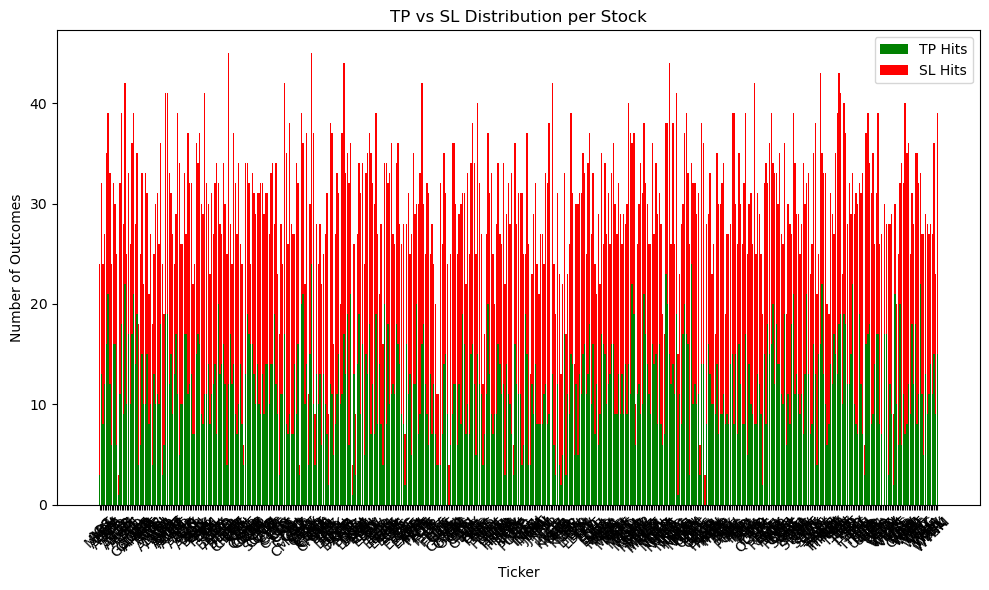


✅ High Win Rate Stocks (>=45%):
    Ticker  Trades  TP_Hits  SL_Hits  Win_Rate (%)
4      ACN      35       16       19         45.71
5     ADBE      39       21       18         53.85
8      AFL      33       16       16         48.48
9        A      30       16       14         53.33
13     ALB      39       18       21         46.15
..     ...     ...      ...      ...           ...
472    WRB      32       20       12         62.50
479     WM      31       18       13         58.06
481    WEC      37       18       17         48.65
484    WST      35       22       11         62.86
490   WDAY      28       14       14         50.00

[137 rows x 5 columns]


In [74]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
import matplotlib.pyplot as plt

# Step 1: Get list of S&P 500 tickers from Wikipedia
def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'id': 'constituents'})
    tickers = [row.find_all('td')[0].text.strip() for row in table.find_all('tr')[1:]]
    return tickers

tickers = get_sp500_tickers()

# ✅ To test with more or fewer stocks, change the number here
tickers = tickers[:500]  # 🔁 CHANGE THIS NUMBER to test with more stocks

# Global counters
total_tp = 0
total_sl = 0
total_trades = 0

# List to collect per-stock stats
results = []

# Step 2: Loop through each stock and apply the strategy
for ticker in tickers:
    try:
        print(f"\nRunning strategy for {ticker}...")
        data = yf.download(ticker, start="2010-01-01", end="2023-12-31", interval="1d", auto_adjust=False)

        if data.empty:
            print(f"{ticker} has no data.")
            continue

        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)
        data.index = pd.to_datetime(data.index)

        weekly = data.resample('W-MON').agg({
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last'
        })
        weekly.dropna(inplace=True)

        tp_count = 0
        sl_count = 0
        trades = 0

        for i in range(2, len(weekly)-1):
            prev2 = weekly.iloc[i-2]
            prev1 = weekly.iloc[i-1]
            current = weekly.iloc[i]

            if (
                prev2['High'] > prev1['High'] and
                prev2['Low'] < prev1['Low'] and
                current['Close'] > prev1['High']
            ):
                trades += 1
                entry_price = current['Close']
                sl = prev2['Low']
                tp = entry_price + (entry_price - sl) * 3
                entry_date = weekly.index[i]
                daily_range = data.loc[entry_date:]

                for j in range(len(daily_range)):
                    price = daily_range.iloc[j]['Close']
                    if price >= tp:
                        tp_count += 1
                        break
                    elif price <= sl:
                        sl_count += 1
                        break

        # Save individual stock results
        stock_data = {
            'Ticker': ticker,
            'Trades': trades,
            'TP_Hits': tp_count,
            'SL_Hits': sl_count,
            'Win_Rate (%)': round((tp_count / trades) * 100, 2) if trades > 0 else 0
        }
        results.append(stock_data)

        # Save to individual CSV
        #pd.DataFrame([stock_data]).to_csv(f"{ticker}_strategy_results.csv", index=False)

        # Print per-stock result
        print(f"{ticker} | Trades: {trades}, TP Hits: {tp_count}, SL Hits: {sl_count}")

        # Update global totals
        total_tp += tp_count
        total_sl += sl_count
        total_trades += trades

        # Pause between tickers to avoid rate limit
        time.sleep(1)

    except Exception as e:
        print(f"Error with {ticker}: {e}")
        continue

# Final Summary
print("\n---------- FINAL SUMMARY ----------")
print("Total Trades:", total_trades)
print("TP Hit:", total_tp)
print("SL Hit:", total_sl)
if total_trades > 0:
    win_rate = round(total_tp / total_trades * 100, 2)
    print("Win Rate (%):", win_rate)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# ✅ Save all results to one CSV
results_df.to_csv("all_stocks_strategy_results.csv", index=False)

# 📈 Plot TP/SL distribution
plt.figure(figsize=(10, 6))
plt.bar(results_df['Ticker'], results_df['TP_Hits'], label='TP Hits', color='green')
plt.bar(results_df['Ticker'], results_df['SL_Hits'], bottom=results_df['TP_Hits'], label='SL Hits', color='red')
plt.xlabel("Ticker")
plt.ylabel("Number of Outcomes")
plt.title("TP vs SL Distribution per Stock")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("TP_SL_Distribution.png")
plt.show()

# 🔍 Filter high win rate stocks
high_win_df = results_df[results_df['Win_Rate (%)'] >= 45]
print("\n✅ High Win Rate Stocks (>=45%):")
print(high_win_df)


[*********************100%***********************]  1 of 1 completed


Running strategy for AAPL...

AAPL | Trades: 4, TP Hits: 1, SL Hits: 3, Win Rate: 25.0%


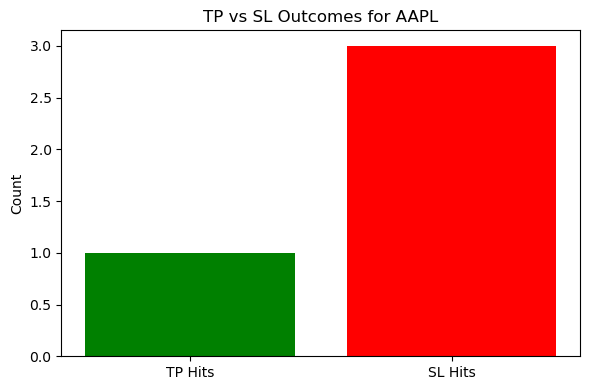

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Choose only Apple
ticker = "AAPL"

# Download historical daily data
print(f"\nRunning strategy for {ticker}...")
data = yf.download(ticker, start="2023-01-01", end="2023-12-31", interval="1d", auto_adjust=False)

if data.empty:
    print(f"{ticker} has no data.")
else:
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    data.index = pd.to_datetime(data.index)

    # Weekly aggregation (Monday open, high, low, close)
    weekly = data.resample('W-MON').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last'
    })
    weekly.dropna(inplace=True)

    tp_count = 0
    sl_count = 0
    trades = 0

    for i in range(2, len(weekly)-1):
        prev2 = weekly.iloc[i-2]
        prev1 = weekly.iloc[i-1]
        current = weekly.iloc[i]

        if (
            prev2['High'] > prev1['High'] and
            prev2['Low'] < prev1['Low'] and
            current['Close'] > prev1['High']
        ):
            trades += 1
            entry_price = current['Close']
            sl = prev2['Low']
            tp = entry_price + (entry_price - sl) * 3
            entry_date = weekly.index[i]
            daily_range = data.loc[entry_date:]

            for j in range(len(daily_range)):
                price = daily_range.iloc[j]['Close']
                if price >= tp:
                    tp_count += 1
                    break
                elif price <= sl:
                    sl_count += 1
                    break

    # Summary and Output
    win_rate = round((tp_count / trades) * 100, 2) if trades > 0 else 0
    print(f"\n{ticker} | Trades: {trades}, TP Hits: {tp_count}, SL Hits: {sl_count}, Win Rate: {win_rate}%")

    # Optional Plot
    plt.figure(figsize=(6, 4))
    plt.bar(['TP Hits', 'SL Hits'], [tp_count, sl_count], color=['green', 'red'])
    plt.title(f"TP vs SL Outcomes for {ticker}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"{ticker}_tp_sl_plot.png")
    plt.show()


[*********************100%***********************]  1 of 1 completed


Running strategy for AAPL...
Trade 1: Entry Date: 2023-03-20, Entry Price: 157.39999389648438, SL: 143.89999389648438, TP: 197.89999389648438
TP Hit on 2023-12-13 at Price: 197.9600067138672
Trade 2: Entry Date: 2023-06-05, Entry Price: 179.5800018310547, SL: 170.4199981689453, TP: 207.0600128173828
SL Hit on 2023-10-26 at Price: 166.88999938964844
Trade 3: Entry Date: 2023-06-19, Entry Price: 184.9199981689453, SL: 176.57000732421875, TP: 209.969970703125
SL Hit on 2023-08-16 at Price: 176.57000732421875
Trade 4: Entry Date: 2023-07-17, Entry Price: 193.99000549316406, SL: 185.6699981689453, TP: 218.9500274658203
SL Hit on 2023-08-04 at Price: 181.99000549316406

AAPL | Trades: 4, TP Hits: 1, SL Hits: 3, Win Rate: 25.0%


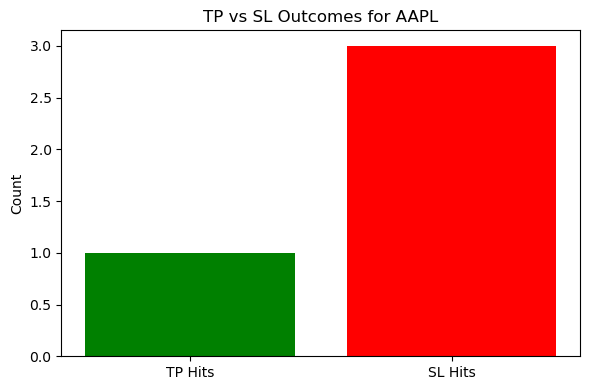

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Choose only Apple
ticker = "AAPL"

# Download historical daily data
print(f"\nRunning strategy for {ticker}...")
data = yf.download(ticker, start="2023-01-01", end="2023-12-31", interval="1d", auto_adjust=False)

if data.empty:
    print(f"{ticker} has no data.")
else:
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    data.index = pd.to_datetime(data.index)

    # Weekly aggregation (Monday open, high, low, close)
    weekly = data.resample('W-MON').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last'
    })
    weekly.dropna(inplace=True)

    tp_count = 0
    sl_count = 0
    trades = 0

    for i in range(2, len(weekly)-1):
        prev2 = weekly.iloc[i-2]
        prev1 = weekly.iloc[i-1]
        current = weekly.iloc[i]

        if (
            prev2['High'] > prev1['High'] and
            prev2['Low'] < prev1['Low'] and
            current['Close'] > prev1['High']
        ):
            trades += 1
            entry_price = current['Close']
            sl = prev2['Low']
            tp = entry_price + (entry_price - sl) * 3
            entry_date = weekly.index[i]
            daily_range = data.loc[entry_date:]

            # Print entry details for troubleshooting
            print(f"Trade {trades}: Entry Date: {entry_date.strftime('%Y-%m-%d')}, Entry Price: {entry_price}, SL: {sl}, TP: {tp}")

            for j in range(len(daily_range)):
                price = daily_range.iloc[j]['Close']
                if price >= tp:
                    tp_count += 1
                    print(f"TP Hit on {daily_range.index[j].strftime('%Y-%m-%d')} at Price: {price}")
                    break
                elif price <= sl:
                    sl_count += 1
                    print(f"SL Hit on {daily_range.index[j].strftime('%Y-%m-%d')} at Price: {price}")
                    break

    # Summary and Output
    win_rate = round((tp_count / trades) * 100, 2) if trades > 0 else 0
    print(f"\n{ticker} | Trades: {trades}, TP Hits: {tp_count}, SL Hits: {sl_count}, Win Rate: {win_rate}%")

    # Optional Plot
    plt.figure(figsize=(6, 4))
    plt.bar(['TP Hits', 'SL Hits'], [tp_count, sl_count], color=['green', 'red'])
    plt.title(f"TP vs SL Outcomes for {ticker}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"{ticker}_tp_sl_plot.png")
    plt.show()
